# Pandas教程

### 七月在线 julyedu.com
by 褚则伟 

## 目录
- Group by
- Aggregate

## Group By
### 七月在线 julyedu.com

举个栗子，假设我们现在有一张公司每个员工的收入流水。

In [27]:
import pandas as pd
import numpy as np
salaries = pd.DataFrame({
    'Name': ['July', 'Zewei', 'Zewei', 'Han', 'July', 'July', 'Zewei', 'July'],
    'Year': [2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary': [10000,2000,4000,5000,18000,25000,3000,4000],
    'Bonus': [3000,1000,1000,1200,4000,2300,500,1000]
})
print(salaries)

   Bonus   Name  Salary  Year
0   3000   July   10000  2016
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
3   1200    Han    5000  2016
4   4000   July   18000  2017
5   2300   July   25000  2017
6    500  Zewei    3000  2017
7   1000   July    4000  2017


接下来我给大家演示一下什么叫做Group By

In [2]:
group_by_name = salaries.groupby('Name')
group_by_name

groupby构造了一个GroupBy object，我们可以对这个object做各种操作

In [57]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.347289,-1.246721
1,bar,one,-0.802377,-0.051546
2,foo,two,0.512485,-0.310273
3,bar,three,0.296485,0.375633
4,foo,two,-0.119325,-0.680112
5,bar,two,0.761996,-0.058217
6,foo,one,-0.724180,1.451038
7,foo,three,-1.430352,1.481509


In [51]:
def get_letter_type(letter):
    if letter.lower() in "aeiou":
        return "vowel"
    else:
        return "consonant"

In [53]:
grouped = df.groupby(get_letter_type, axis=1)

In [56]:
grouped.sum()

,consonant,vowel
0,2.425845,foo
1,1.399867,bar
2,-1.558198,foo
3,0.700978,bar
4,0.921519,foo
5,-0.851235,bar
6,0.572851,foo
7,0.846317,foo


### groupby之后一般要做一些aggregate操作

In [3]:
group_by_name.sum()

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


默认会排序，也可以选择不排序

In [5]:
salaries.groupby('Name', sort=False).sum()

,Bonus,Salary,Year
Name,,,
July,10300,57000,8067
Zewei,2500,9000,6049
Han,1200,5000,2016


也可以这么写

In [4]:
group_by_name.aggregate(sum)

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


group by的attributes

In [16]:
print(group_by_name.groups)
print(len(group_by_name))

{'Han': Int64Index([3], dtype='int64'), 'July': Int64Index([0, 4, 5, 7], dtype='int64'), 'Zewei': Int64Index([1, 2, 6], dtype='int64')}
3


,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


可以用多个columns做group by

In [17]:
group_by_name_year = salaries.groupby(['Name', 'Year'])
group_by_name_year.sum()

Bonus  Salary
Name  Year               
Han   2016   1200    5000
July  2016   3000   10000
      2017   7300   47000
Zewei 2016   2000    6000
      2017    500    3000

除了sum之外，我们再来尝试一下size,mean,median 

In [196]:
group_by_name_year.size()

Name  Year
Chu   2016    2
      2017    1
July  2016    1
      2017    3
Lin   2016    1
dtype: int64

In [19]:
group_by_name.mean()

,Bonus,Salary,Year
Name,,,
Han,1200.000000,5000.0,2016.000000
July,2575.000000,14250.0,2016.750000
Zewei,833.333333,3000.0,2016.333333


In [20]:
group_by_name.median()

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,2650,14000,2017
Zewei,1000,3000,2016


In [24]:
group_by_name.describe()

Bonus                                                                    \
      count         mean          std     min     25%     50%     75%     max   
Name                                                                            
Han     1.0  1200.000000          NaN  1200.0  1200.0  1200.0  1200.0  1200.0   
July    4.0  2575.000000  1260.621540  1000.0  1975.0  2650.0  3250.0  4000.0   
Zewei   3.0   833.333333   288.675135   500.0   750.0  1000.0  1000.0  1000.0   

      Salary            ...                      Year                        \
       count     mean   ...        75%      max count         mean      std   
Name                    ...                                                   
Han      1.0   5000.0   ...     5000.0   5000.0   1.0  2016.000000      NaN   
July     4.0  14250.0   ...    19750.0  25000.0   4.0  2016.750000  0.50000   
Zewei    3.0   3000.0   ...     3500.0   4000.0   3.0  2016.333333  0.57735   

                                                
          min      25%     50%     75%     max  
Name                                            
Han    2016.0  2016.00  2016.0  2016.0  2016.0  
July   2016.0  2016.75  2017.0  2017.0  2017.0  
Zewei  2016.0  2016.00  2016.0  2016.5  2017.0  

[3 rows x 24 columns]

### iterate GroupBy object

In [22]:
for name, group in group_by_name:
    print(name)
    print(group)

Han
   Bonus Name  Salary  Year
3   1200  Han    5000  2016
July
   Bonus  Name  Salary  Year
0   3000  July   10000  2016
4   4000  July   18000  2017
5   2300  July   25000  2017
7   1000  July    4000  2017
Zewei
   Bonus   Name  Salary  Year
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
6    500  Zewei    3000  2017


选择一个group

In [23]:
print(group_by_name.get_group("Zewei"))
type(group_by_name.get_group("Zewei"))


   Bonus  Salary  Year
1   1000    2000  2016
2   1000    4000  2016
6    500    3000  2017


pandas.core.frame.DataFrame

In [31]:
group_by_name.agg([np.sum, np.mean, np.std])

Bonus                           Salary                      Year  \
         sum         mean          std    sum   mean          std   sum   
Name                                                                      
Han     1200  1200.000000          NaN   5000   5000          NaN  2016   
July   10300  2575.000000  1260.621540  57000  14250  9178.779875  8067   
Zewei   2500   833.333333   288.675135   9000   3000  1000.000000  6049   

                             
              mean      std  
Name                         
Han    2016.000000      NaN  
July   2016.750000  0.50000  
Zewei  2016.333333  0.57735

In [197]:
# group_by_name_year.describe()

### transform

In [71]:
nvda = pd.read_csv("data/NVDA.csv", index_col=0)
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [59]:
key = lambda x: x[:4]

In [60]:
df.groupby(key).sum()

,Open,High,Low,Close,Adj Close,Volume
1999,466.236931,479.748691,450.170564,465.388003,432.144014,1537539600
2000,2212.833273,2324.119758,2106.851546,2212.264221,2054.235826,2782537800
2001,3246.630925,3372.986111,3144.776022,3269.024912,3035.509070,6900320700
2002,2441.966662,2508.683327,2354.786653,2422.916673,2249.840757,7985009700
2003,1487.413339,1522.750004,1452.770001,1486.886664,1380.674086,6124155000
2004,1634.153335,1665.420009,1601.096667,1629.409996,1513.016569,4299954900
2005,2397.119994,2434.233329,2357.000000,2397.483335,2226.224187,3887919300
2006,4532.533321,4624.706682,4447.789998,4542.086679,4217.632322,3851459000
2007,6968.273319,7091.170005,6828.719994,6958.860015,6461.768676,3801550500
2008,4049.089993,4155.839998,3926.929993,4034.240013,3746.062640,5117485100


In [61]:
zscore = lambda x: (x-x.mean())/x.std()

In [66]:
transformed = df.groupby(key).transform(zscore)
transformed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


In [63]:
%matplotlib inline

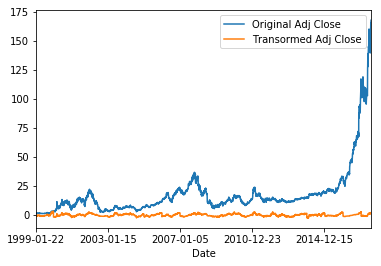

In [64]:
compare = pd.DataFrame({"Original Adj Close": df["Adj Close"], 
                        "Transormed Adj Close": transformed["Adj Close"]})
compare.plot()

In [67]:
price_range = lambda x: x.max() - x.min()
df.groupby(key).transform(price_range)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.531250,2.510417,2.546875,2.364945,67375200.0
1999-01-25,2.552084,2.531250,2.510417,2.546875,2.364945,67375200.0
1999-01-26,2.552084,2.531250,2.510417,2.546875,2.364945,67375200.0
1999-01-27,2.552084,2.531250,2.510417,2.546875,2.364945,67375200.0
1999-01-28,2.552084,2.531250,2.510417,2.546875,2.364945,67375200.0
1999-01-29,2.552084,2.531250,2.510417,2.546875,2.364945,67375200.0
1999-02-01,2.552084,2.531250,2.510417,2.546875,2.364945,67375200.0
1999-02-02,2.552084,2.531250,2.510417,2.546875,2.364945,67375200.0
1999-02-03,2.552084,2.531250,2.510417,2.546875,2.364945,67375200.0


In [68]:
df.groupby(key).transform("max") - df.groupby(key).transform("min")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.531250,2.510417,2.546875,2.364945,67375200
1999-01-25,2.552084,2.531250,2.510417,2.546875,2.364945,67375200
1999-01-26,2.552084,2.531250,2.510417,2.546875,2.364945,67375200
1999-01-27,2.552084,2.531250,2.510417,2.546875,2.364945,67375200
1999-01-28,2.552084,2.531250,2.510417,2.546875,2.364945,67375200
1999-01-29,2.552084,2.531250,2.510417,2.546875,2.364945,67375200
1999-02-01,2.552084,2.531250,2.510417,2.546875,2.364945,67375200
1999-02-02,2.552084,2.531250,2.510417,2.546875,2.364945,67375200
1999-02-03,2.552084,2.531250,2.510417,2.546875,2.364945,67375200


In [70]:
tencent = pd.read_csv("data/0700.HK.csv")
tencent.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-06-16,0.875000,0.925000,0.815000,0.830000,0.751258,2198875000
1,2004-06-17,0.830000,0.875000,0.825000,0.845000,0.764835,419007500
2,2004-06-18,0.840000,0.850000,0.790000,0.805000,0.728630,182990000
3,2004-06-21,0.820000,0.825000,0.790000,0.800000,0.724104,114085000
4,2004-06-22,null,null,null,null,null,null


In [72]:
goog = pd.read_csv("data/GOOG.csv")
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


NameError: name 'stocks' is not defined